# HW#1 Linear Regression

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Gradient descent를 이용하여 Linear regression을 구현해 보는 것입니다. 





## 1 - Package import

먼저 과제에 필요한 package를 import 합니다.
- [numpy](www.numpy.org)는 파이썬에서 행렬 연산을 위한 핵심 라이브러리입니다.
- [matplotlib](http://matplotlib.org) 파이썬에서 plot을 위한 라이브러리입니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Data generation

Linear regression을 위한 데이터를 생성해봅시다.
이 데이터를 잘 표현하는 직선을 찾는 것이 linear regression의 목적입니다.

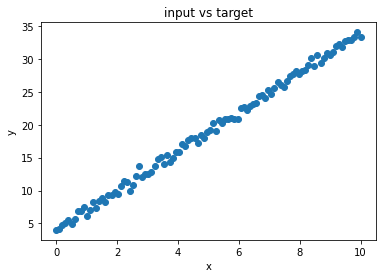

In [ ]:
# 데이터 생성, x:input, y:target
# y=ax+b 형태, y=3x+4라고 하자

x = np.array([np.linspace(0, 10, 100)]) # 0부터 10까지 100개의 데이터를 생성합니다.
y = 3 * x + 4 + np.random.randn(*x.shape) * 0.5  # noise값을 변화하면서 다양한 데이터를 생성해 보세요.

plt.scatter(x, y)
plt.title('input vs target')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

데이터의 모양을 살펴볼까요? 

shape 함수를 쓰면 data의 shape를 알 수 있습니다.


example) data라는 변수의 shape: data.shape

**Exercise:** input data x와 output data y의 형태를 출력해보세요.

In [ ]:
# Data의 사이즈를 출력해보세요.
### START CODE HERE ###
x_shape = 
y_shape = 
### END CODE HERE ###
print ("The shape of input data x: " + str(x_shape))
print ("The shape of target data y: " + str(y_shape))

The shape of input data x: (1, 100)
The shape of target data y: (1, 100)


**Expected Output**: 

The shape of input data x: (1, 100)

The shape of target data y: (1, 100)

## 3 - General Architecture of the learning algorithm ##

Linear regression을 구하기 위해서 우리의 hypothesis는 linear model을 가정합니다. 이 때 i-번째 input data $x^{(i)}$의 추정값 $\hat y^{(i)}$은 (1)과 같은 관계를 만족합니다. 


$$\hat y^{(i)} = w x^{(i)} + b \tag{1}$$

$\hat y$ 은 y-hat이라고 읽으며 $y$의 값을 추정한다는 의미로 흔히 쓰이는 표현입니다. 이 때 추정값 $\hat y^{(i)}$와 target값인 $y$ 사이에 loss function을 squared error 형태로 나타내면 (2)와 같습니다.

$$ \mathcal{L}(\hat y^{(i)}, y^{(i)}) =  \frac{1}{2}(\hat y^{(i)}-y^{(i)})^2 \tag{2}$$

마지막으로 전체 데이터 m개에 대한 cost function은 (3)과 같이 정의됩니다.

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat y^{(i)}, y^{(i)})\tag{3}$$

최종적으로 이 cost function의 값을 최소화하는 $w$와 $b$를 찾는 것이 우리의 목표가 되는 것입니다.


## 4 - Gradient descent algorithm ## 
Gradient descent algorithm은 다음과 같은 단계로 구현합니다.

1. Parameter 초기화 `initialize_with_zeros()`
2. Loop (최적화 과정): `optimize()`
    - 현재 cost 계산(forward propagation) 및 현재 gradient를 계산 (backward propagation) : `propagate()`
    - Parameter 업데이트(gradient descent)

이 모든 과정을 합쳐서 `model()` 함수로 구현합니다.

### 4.1 - Parameter 초기화
**Exercise:** 아래 Parameter 초기화 함수를 구현하세요. $w$의 경우 0으로 이루어진 벡터이고 $b$의 경우 스칼라값 0으로 초기화하세요. np.zeros() 함수를 참고하세요.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ###
    w = 
    b = 
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


w = [[0.]\
     [0.]]

b = 0

### 4.2 - Forward and Backward propagation
**Exercise:** cost값 및 gradient를 계산하는 `propagate()` 함수를 구현하세요.

**Hints**:

Forward Propagation:
- X를 인수로 받는다.
- (1), (2), (3)을 합쳐서 전개하면 다음과 같은 cost function 식이 나온다.
$$J = \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})^2\tag{4}$$

Backward Propagation:
- w와 b의 gradient를 계산한다.

$$ \frac{\partial J}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})\cdot x^{(i)}\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (wx^{(i)}+b-y^{(i)})\tag{6}$$

이를 행렬 형태로 쓰면 다음과 같다.

$$J = \frac{1}{2m}np.sum[w^TX+b-Y]^.2\tag{4'}$$
\
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(w^TX+b-Y)^T\tag{5'}$$
\
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \ np.sum [w^TX+b-Y]\tag{6'}$$


In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of size (dim, number of examples)
    Y -- true "label" vector (containing 0 or 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ###
    cost = 
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ###
    dw =
    db =
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 41.49333333333333


**Expected Output**:

dw = [[12.8       ]
 
 [30.82666667]]

db = 4.533333333333333

cost = 41.49333333333333

### 4.3 - Optimization
현재 parameter에 새로운 parameter를 업데이트하는 함수 `optimize()` 함수를 구현하세요.

**Exercise:** 우리의 parameter $w$와 $b$를 업데이트하는 식을 구현해야 합니다. paramter를 $\theta$라고 할 때, 업데이트 규칙은 $ \theta = \theta - \alpha \text{ } d\theta$로 정의됩니다. 이 때 $\alpha$를 learning rate라고 합니다.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of shape (dim, number of examples)
    Y -- true "label" vector (containing 0 or 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        ### START CODE HERE ### 
        grads, cost = 
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        ### START CODE HERE ###
        w = 
        b = 
        ### END CODE HERE ###
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.04675219]
 [-0.12676061]]
b = 1.223758731602527
dw = [[ 0.12274692]
 [-0.09406359]]
db = 0.36833971156600487


**Expected Output**: 

w = [[-0.04675219]

 [-0.12676061]]

b = 1.223758731602527

dw = [[ 0.12274692]

 [-0.09406359]]
 
db = 0.36833971156600487

## 5 - Merge all functions into a model ##

**Exercise:** 최종적으로 앞서 구한 함수들을 이용하여 model 함수를 구현하세요.

In [ ]:
# GRADED FUNCTION: model

def model(X, Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (dim, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (dim, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros
    w, b = 

    # Gradient descent
    parameters, grads, costs =
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = 
    b = 
     
    ### END CODE HERE ###
  
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(x, y, num_iterations = 1000, learning_rate = 0.02, print_cost = True)

Cost after iteration 0: 218.652638
Cost after iteration 100: 0.701655
Cost after iteration 200: 0.343369
Cost after iteration 300: 0.210938
Cost after iteration 400: 0.161988
Cost after iteration 500: 0.143895
Cost after iteration 600: 0.137207
Cost after iteration 700: 0.134736
Cost after iteration 800: 0.133822
Cost after iteration 900: 0.133484


**Expected Output**: 

Cost after iteration 0: 218.021738

Cost after iteration 100: 1.053341

Cost after iteration 200: 0.692178

Cost after iteration 300: 0.470978

Cost after iteration 400: 0.335501

Cost after iteration 500: 0.252526

Cost after iteration 600: 0.201707

Cost after iteration 700: 0.170582

Cost after iteration 800: 0.151519

Cost after iteration 900: 0.139843



## 6 - Visualization ##
Learning이 진행될수록 cost가 어떻게 나타나는지 확인해보세요.


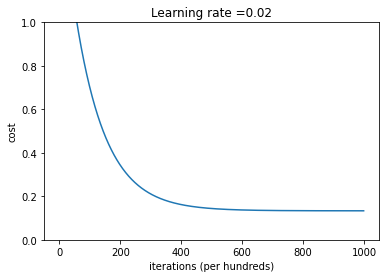

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.ylim((0,1))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Gradient descent를 통해 추정한 직선을 plot하여 Linear regression이 잘 되는지 확인해보세요.

w = [[3.00003026]]
b = 3.986152122221329


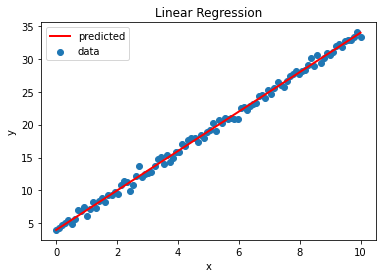

In [ ]:
print ("w = " + str(d["w"]))
print ("b = " + str(d["b"]))

y_hat = np.dot(np.transpose(d["w"]),x)+d["b"]
plt.scatter(x, y,label='data')
plt.plot(np.transpose(x),np.transpose(y_hat), color='red', linewidth=2, label='predicted')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

##(Optioanal) multi-dimensional Linear Regression
input data가 1차원일때 linear regression을 수행하면 데이터를 잘 표현하는 직선을 찾습니다. 만약 input data가 2차원이라면 평면을 찾게 됩니다. 추가 구현을 하고 싶은 학생들은 한번 구현해서 확인해 보세요.

Text(0.5, 0, 'y')

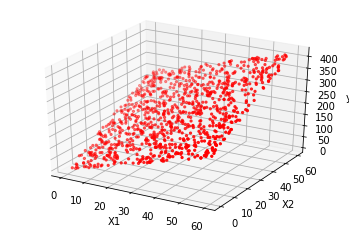

In [ ]:
X = np.random.rand(2000).reshape(2,1000)*60
Y = np.array([X[0, :]*3+X[1, :]*4])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], Y, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

Cost after iteration 0: 24637.456202
Cost after iteration 100: 0.113821
Cost after iteration 200: 0.000885
Cost after iteration 300: 0.000735
Cost after iteration 400: 0.000733
Cost after iteration 500: 0.000731
Cost after iteration 600: 0.000729
Cost after iteration 700: 0.000727
Cost after iteration 800: 0.000725
Cost after iteration 900: 0.000723


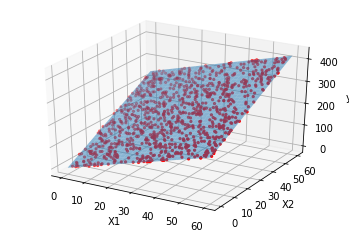